# 파이썬 데이터분석 실습

# 순서
0. 데이터 확인
1. 필요 라이브러리 임포트 및 파일 읽어오기
2. EDA 탐색적 데이터 분석
3. 데이터 전처리 수행
 - 필요한 컬럼 정리
 - 컬럼 데이터 정제
 - Null 처리
 - 컬럼 type 변경하기
4. 데이터 시각화
5. 결과 저장

In [1]:
## 데이터 로드

import pandas as pd
import numpy as np

df = pd.read_csv("C:\\Users\\user\\Downloads\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info() #컬럼의 개수 및 종류 그리고 각 컬럼의 데이터 타입 동시에 확인, null은 없는 것으로 보임

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
print(df.describe(include='object')) #문자형 컬럼에 대한 정보들도 종합적으로 확인

        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No              No  Month-to-month   
freq

In [7]:
df['TotalCharges'].unique() #사실상 숫자인데 문자형으로 되어 있음. 

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
# TotalCharges 컬럼을 숫자형으로 변환 (오류 시 NaN 처리)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [11]:
df.describe() #int나 float형에 대한 정보만 따로 출력

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
## 삭제할 컬럼 선택 : 고객ID, 이는 애초에 식별자로 데이터 분석에 있어 무의미할 것으로 생각해 삭제 
df = df.drop(columns=['customerID'])
df.info() #삭제된 것 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
# 범주형 데이터 숫자형으로 변환
for col in df.select_dtypes(include='object').columns: df[col] = df[col].astype('category').cat.codes

In [19]:
df.isnull().sum() #null이 존재하는지 재확인, TotalCharges에 있는 것 확인

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
df = df.dropna(subset=['TotalCharges']) #삭제
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int8   
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int8   
 3   Dependents        7032 non-null   int8   
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int8   
 6   MultipleLines     7032 non-null   int8   
 7   InternetService   7032 non-null   int8   
 8   OnlineSecurity    7032 non-null   int8   
 9   OnlineBackup      7032 non-null   int8   
 10  DeviceProtection  7032 non-null   int8   
 11  TechSupport       7032 non-null   int8   
 12  StreamingTV       7032 non-null   int8   
 13  StreamingMovies   7032 non-null   int8   
 14  Contract          7032 non-null   int8   
 15  PaperlessBilling  7032 non-null   int8   
 16  PaymentMethod     7032 non-null   int8   
 17  

In [23]:
### 시각화 ###

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47784 (\N{HANGUL SYLLABLE MO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46304 (\N{HANGUL SYLLABLE DEUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52972 (\N{HANGUL SYLLABLE KEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47100 (\N{HANGUL SYLLABLE REOM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46308 (\N{HANGUL SYLLABLE DEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\anaconda3\Lib

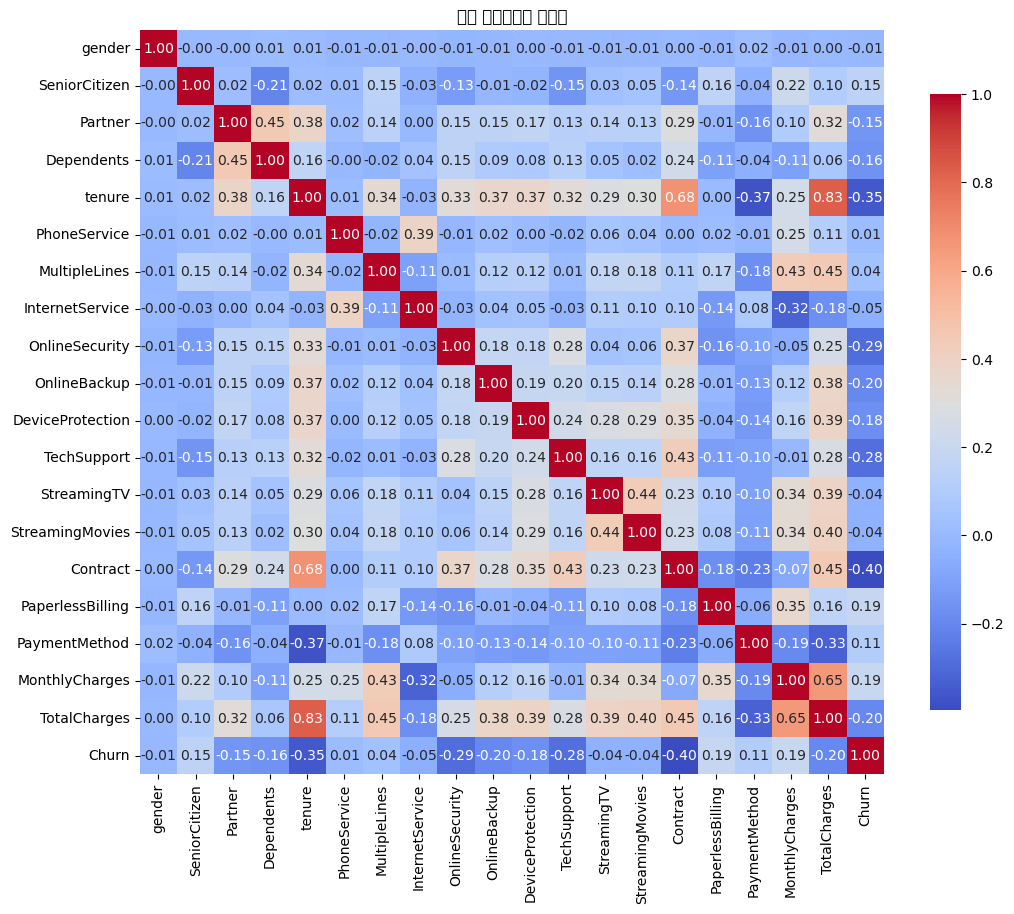

In [27]:
# 모든 변수들간에 히트맵 시각화하여 각 컬럼이 서로간에 미치는 영향을 파악하여 분석에 활용
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('모든 컬럼들간에 시각화')
plt.show()

In [29]:
# 분석에 있어 가장 중요한 컬럼인 churn(이탈 여부)과 다른 컬럼들 간의 상관도만 따로 출력하여 유의미한 컬럼 선정에 참고
df.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

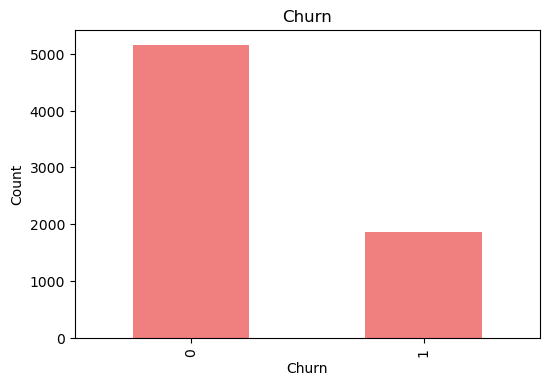

In [31]:
# Churn 컬럼
plt.figure(figsize=(6, 4))
df['Churn'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

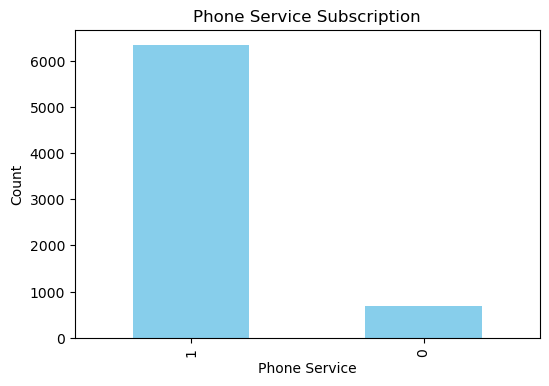

In [33]:
# PhoneService컬럼
plt.figure(figsize=(6, 4))
df['PhoneService'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Phone Service Subscription')
plt.xlabel('Phone Service')
plt.ylabel('Count')
plt.show()

#### 대부분의 고객들이 핸드폰 서비스를 가입

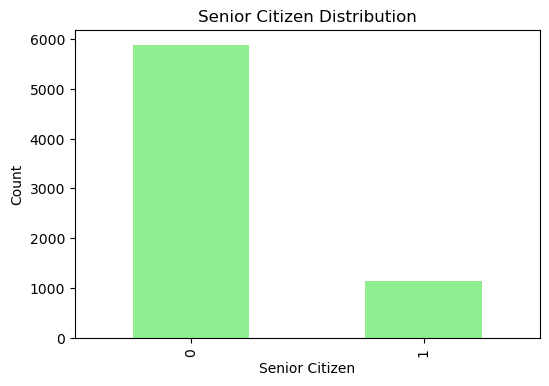

In [35]:
# SeniorCitizen 컬럼
plt.figure(figsize=(6, 4))
df['SeniorCitizen'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Senior Citizen Distribution')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')
plt.show()

#### 대부분의 고객이 고령자가 아니며, 고령자는 전체 고객 중 소수

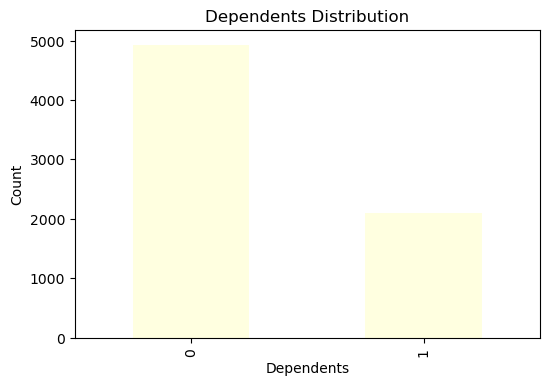

In [37]:
# Dependents 컬럼
plt.figure(figsize=(6, 4))
df['Dependents'].value_counts().plot(kind='bar', color='lightyellow')
plt.title('Dependents Distribution')
plt.xlabel('Dependents')
plt.ylabel('Count')
plt.show()

#### 대부분의 고객들이 부양자가 없음을 확인

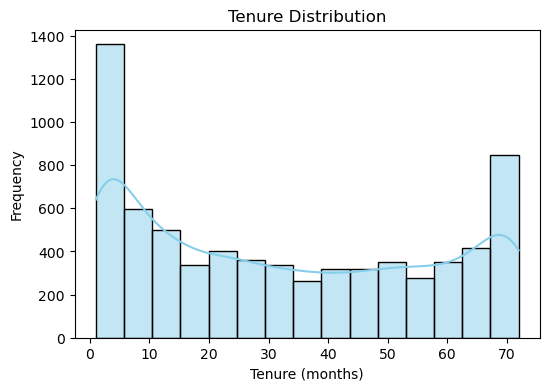

In [39]:
# tenure 컬럼
plt.figure(figsize=(6, 4))
sns.histplot(df['tenure'], kde=True, color='skyblue')
plt.title('Tenure Distribution')
plt.xlabel('Tenure (months)')
plt.ylabel('Frequency')
plt.show()

#### 상당수가 신규 고객이며 장기 고객 비율 역시 높은 편, 신규 고객의 유지를 위한 추가적인 조치가 있으면 유리할듯

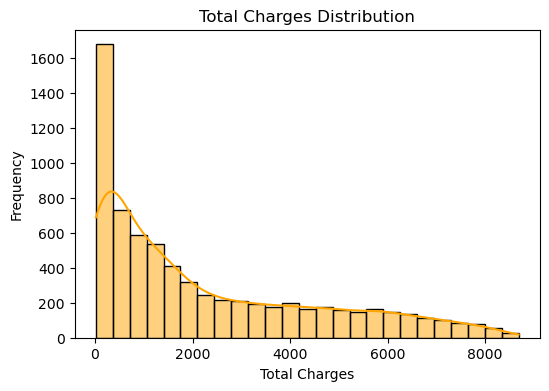

In [41]:
# TotalCharges 컬럼
plt.figure(figsize=(6, 4))
sns.histplot(df['TotalCharges'], kde=True, color='orange')
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.show()

#### 총 요금이 낮은 고객들이 많은 비율을 차지, 이용 기간이 짧은 고객은 총 요금도 낮은 경우가 많아 역시 신규 고객 유지를 위한 추가적인 혜택 필요!

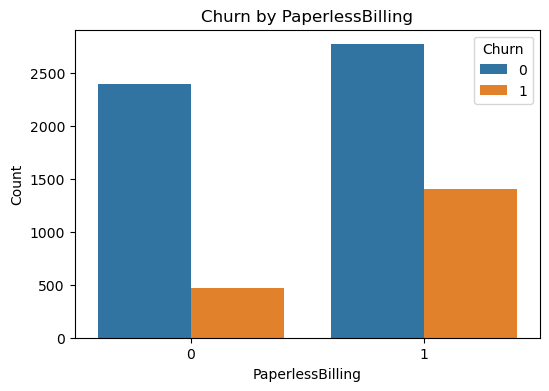

In [43]:
# Countplot : PaperlessBilling 컬럼
plt.figure(figsize=(6, 4))
sns.countplot(x='PaperlessBilling', hue='Churn', data=df)
plt.title('Churn by PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.show()

#### 전자 청구서를 사용하는 고객 중 이탈한 고객(Churn = 1)의 비율이 전자 청구서를 사용하지 않는 고객에 비해 상대적으로 높음. 전자청구서 사용 고객에 대한 확보전략이 필요할 듯

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21336\996325435.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Churn'] == 0]['tenure'], label='Churn = 0', shade=True)
C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_21336\996325435.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Churn'] == 1]['tenure'], label='Churn = 1', shade=True)


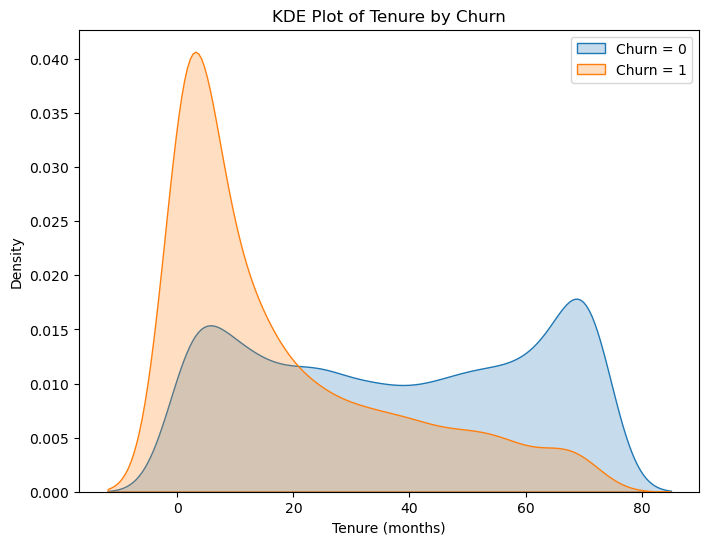

In [45]:
# KDE : Tenure컬럼
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df[df['Churn'] == 0]['tenure'], label='Churn = 0', shade=True)
sns.kdeplot(data=df[df['Churn'] == 1]['tenure'], label='Churn = 1', shade=True)
plt.title('KDE Plot of Tenure by Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Density')
plt.legend()
plt.show()

#### 가입기간이 길수록 이탈하지 않은 고객의 비율이 높아지는 경향이 있음. 충성 고객 확보 및 유지를 위한 전략 필요할듯

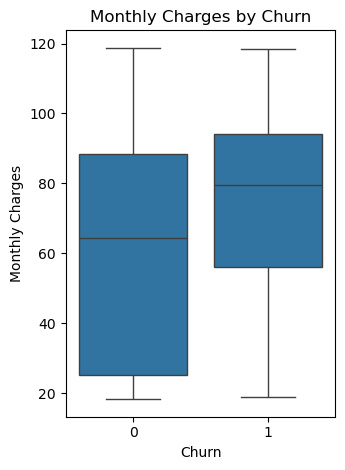

In [47]:
# 박스플롯 : MonthlyCharges 컬럼
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')

plt.tight_layout()
plt.show()

#### 분포가 상대적으로 낮은 월 요금 구간에 집중되어있으며 이탈한 고객의 월 요금이 더 높은 편, 합리적인 가격과 혜택 제공이 중요할 듯

## 분석 결과

- **Tenure(가입 기간)** 와 **Churn(이탈)** 간의 관계를 보면, 가입 초기(특히 0~10개월)의 고객 이탈 가능성이 매우 높음. 따라서 신규 고객에게 할인 혜택이나 맞춤형 상담, 교육 서비스를 제공하여, 초기 이탈을 방지하고 장기 고객으로의 전환(=장기계약 체결)을 촉진해야 할 듯.

- 특히 **Contract(계약 형태)** 와 **Churn(이탈)** 간의 관계를 보면, 월 단위 계약을 사용하는 고객의 이탈률이 높은 반면, 연 단위 계약을 선택한 고객은 이탈 가능성이 낮으므로 연단위 고객에 대한 추가적인 혜택이 필요해 보임. 특히 **MonthlyCharges(월 요금)** 와 **Churn(이탈)** 의 관계에서 월 요금이 높은 고객일수록 이탈률이 높은 경향이 있었으므로 장기 계약 고객에 대한 월 단위 가격 혜택을 강화하는 것도 좋아 보임. 물론 월 단위 서비스 자체에 대한 개선도 중요할 듯.

- **SeniorCitizen(고령자 여부)** 와 **Tenure(가입 기간)** 에서는 고령자가 서비스를 이탈할 가능성이 높다는 점을 확인. 고령자 고객을 대상으로 초기 지원, 전담 상담 서비스 제공 등 지원 강화가 필요할 듯.

- **TechSupport(기술 지원)** 및 **OnlineSecurity(온라인 보안 서비스)** 사용 여부가 고객 이탈과 강한 음의 상관관계를 보임. 이는 기술 지원 및 보안 서비스를 이용하는 고객이 이탈 가능성이 낮았다는 것이며, 그 외 여러 서비스들 역시 고객 이탈을 줄이는 역할을 하므로 지속적인 서비스 개선이 중요.

- **PaperlessBilling(전자 청구서 사용)**과 **Churn(이탈)** 간의 관계에서 전자 청구서를 사용하는 고객의 이탈 가능성이 높음. 사용 편의성 강화가 필요할 듯.
